# Imports

In [46]:
import sys
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

%matplotlib inline

# Constants

In [47]:
TRAIN_PATH = 'datasets/train.csv'
TEST_PATH = 'datasets/test.csv'

# Reading Test Data

In [48]:
df_train = pd.read_csv(TRAIN_PATH)
df_train

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality,NaN
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam,NaN
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality,NaN
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality,NaN
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality,NaN
...,...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam,NaN
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality,NaN
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam,NaN
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality,NaN


# Data Visualization

In [49]:
# Get Number of Quality Tweets
is_quality = df_train['Type'] == 'Quality'
df_train_quality = df_train[is_quality]
print('num_quality:', df_train_quality.size)

# Get Number of Spam Tweets
is_spam = df_train['Type'] == 'Spam'
df_train_spam = df_train[is_spam]
print('num_spam:', df_train_spam.size)

num_quality: 59632
num_spam: 59544


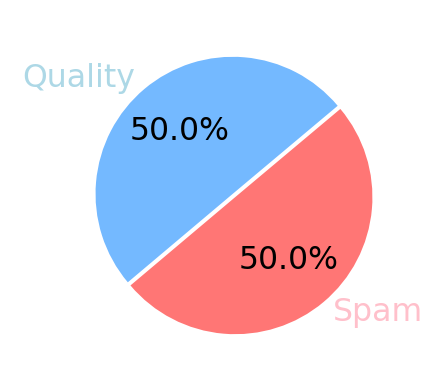

In [50]:
# Creating Pie Chart
category_names = ['Quality', 'Spam']
sizes = [df_train_quality.size, df_train_spam.size]
custom_colors = ['#74b9ff','#ff7675']

plt.figure(figsize=(2, 2), dpi=227)
wedges, labels, percents = plt.pie(sizes, labels=category_names, textprops={'fontsize': 10}, 
                                   startangle=40, autopct='%1.1f%%', colors=custom_colors, 
                                    explode=[0, 0.03])

# label colors
labels[0].set_color('lightblue')
labels[1].set_color('pink')
    
# display pie chart
plt.show()

# Natural Language Processing

1. Convert to lowercase
2. Tokenizing
3. Removing stop words
4. Remove formatting
5. Word Stemming
6. Remove punctuation

## download the NLTK resources (tokenizer & stop words)

tokenizing means splitting up a words in a sentence into individual words

In [51]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/berimbolo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/berimbolo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Tokenizing

In [53]:
msg = 'CSC845 test sentence for team Heavily Caffeinated'
word_tokenize(msg.lower())

['csc845', 'test', 'sentence', 'for', 'team', 'heavily', 'caffeinated']

# Removing Stop Words

In [54]:
stop_words = set(stopwords.words('english'))

In [55]:
''' Example of filtering words '''

from functools import reduce
stemmer = PorterStemmer()

msg = 'created CSC845 test sentence for team Heavily Caffeinated. I like pie.'
words = word_tokenize(msg.lower())

# using reduce
filtered_words = reduce(lambda a,b: a + [stemmer.stem(b)] if b not in stop_words and b.isalpha() else a, words, [])
filtered_words

['creat', 'test', 'sentenc', 'team', 'heavili', 'caffein', 'like', 'pie']

# Functions for Tweet Processing

In [56]:
''' Method tokenizes, removes punctuation, removes stop words, and stems'''
def clean_tweet(message, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
    words = word_tokenize(message.lower())
    return reduce(lambda a,b: a + [stemmer.stem(b)] if b not in stop_words and b.isalpha() else a, words, [])

In [57]:
''' testing function '''

clean_tweet(msg)


['creat', 'test', 'sentenc', 'team', 'heavili', 'caffein', 'like', 'pie']

# Slicing Dataframes

In [58]:
''' Get a specific entry '''
print(df_train.iat[0,0])

Good Morning Love  @LeeBrown_V


### Checking runtime

In [59]:
%%time

nested_list = df_train.Tweet.apply(clean_tweet)
flat_list = [item for sublist in nested_list for item in sublist]

CPU times: user 3.51 s, sys: 1.31 ms, total: 3.51 s
Wall time: 3.52 s


## Using Logic to Slice DataFrames

In [60]:
doc_ids_spam = df_train[df_train.Type == 'Spam'].index
doc_ids_quality = df_train[df_train.Type == 'Quality'].index

In [61]:
doc_ids_spam

Int64Index([    1,     5,     8,     9,    10,    11,    12,    13,    14,
               15,
            ...
            14878, 14880, 14881, 14882, 14886, 14891, 14893, 14894, 14896,
            14898],
           dtype='int64', length=7443)

# Subsetting a Series with an Index

In [62]:
type(doc_ids_spam)

pandas.core.indexes.numeric.Int64Index

In [63]:
type(nested_list)

pandas.core.series.Series

In [64]:
nested_list_quality = nested_list.loc[doc_ids_quality]
nested_list_quality.shape

(7454,)

In [65]:
nested_list_quality.tail()

14889       [need, hear, tvvin, sing, version, live, http]
14890    [know, add, goal, googl, calendar, kinda, cool...
14892    [actual, last, nation, referendum, charlotteto...
14895                                         [like, care]
14897                        [bethannhamilton, busi, good]
Name: Tweet, dtype: object

In [66]:
nested_list_spam = nested_list.loc[doc_ids_spam]
nested_list_spam

1                     [realdonaldtrump, usnavi, rip, hero]
5        [amm, samantha, bee, tri, attack, trump, inste...
8        [bank, brexit, time, invest, uk, colin, ward, ...
9                                    [serv, protect, http]
10                                          [beauti, face]
                               ...                        
14891               [load, back, mood, christmasaftermath]
14893    [kendri, moral, hit, homerun, royal, snap, ser...
14894     [allwentwrongwhen, told, hair, stylist, go, nut]
14896    [miami, graham, nash, live, parker, playhous, ...
14898        [chase, success, space, cadetz, listen, http]
Name: Tweet, Length: 7443, dtype: object

In [67]:
# Non spam tweets
flat_list_quality = [item for sublist in nested_list_quality for item in sublist]
normal_words = pd.Series(flat_list_quality).value_counts() # unique words
normal_words.shape[0] # total num of unique words

11897

In [68]:
normal_words[:10]

http     2264
like      310
get       293
love      274
new       240
go        224
day       221
thank     221
know      205
one       192
dtype: int64

In [69]:
# spam tweets
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spam_words = pd.Series(flat_list_spam).value_counts() # unique words
spam_words.shape[0] # total num of unique words

11667

In [110]:
spam_words[:10]

http     6193
trump     603
news      575
rt        334
new       252
polic     217
man       213
get       211
sport     208
say       205
dtype: int64

# Creating a World Cloud

In [120]:
string = ' '.join([word for word in spam_words.index.to_list()])
string

'http trump news rt new polic man get sport say polit peopl break obama one like kill world amp go us time video black make want day white call hillari state take local love presid need support fire vote america watch show look year clinton american via know think woman see shoot health media attack win good right offic hous back first live would report help never plan use let life home realdonaldtrump busi bill today tri top play work thing death citi come girl talk arrest still ca two liber shot stop elect fight investig school thank gop cnn topnew crime could found maga famili great democrat women die dead tcot law tell cop may counti donald way blacklivesmatt got everi nation pjnet miss offici best run ask end car cleveland texa million releas court give charg game gun potu last deal chang tweet case u real protest hit student kid set leav suspect ever realli open crash keep power san ban murder lead god north forc big isi start countri even accus follow free twitter money happen s

In [113]:
world_cloud = WordCloud().generate(spam_words.index.to_list())
plt.imshow(world_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

TypeError: expected string or bytes-like object